In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [61]:
dataTrain = pd.read_csv('../setTrainMap.csv')


In [62]:
dataTrain.columns

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Ticket', 'Parch', 'Fare',
       'Sex_female', 'Pclass_3', 'Pclass_2', 'Pclass_1', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Mr', 'Mrs', 'Miss', 'Master', 'Dr',
       'OtherTitles', 'With_Cabin', 'Old', 'Kid'],
      dtype='object')

In [63]:
dataTrain = dataTrain[[ 'Survived', 'Age', 'SibSp', 'Ticket', 'Parch', 'Fare',
       'Sex_female', 'Pclass_3', 'Pclass_2', 'Pclass_1', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Mr', 'Mrs', 'Miss', 'Master', 'With_Cabin', 'Kid']]


In [64]:
dataPositivos = dataTrain[dataTrain['Survived'] == 1 ]
dataNegativos = dataTrain[dataTrain['Survived'] == 0 ].head(342)
dataTrainBalanceado = pd.concat([dataNegativos,dataPositivos])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(dataTrainBalanceado.drop(['Survived'], axis=1).values, dataTrainBalanceado["Survived"] , test_size=0.20, random_state=75)


In [66]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [67]:
parameters = {
 "n_estimators":[50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800],
 "max_depth":[2,3,4,5,6,7,8,9,10,11,12,13,14],
 "min_child_weight":[2,3,4,5,6,7,8],
 "colsample_bytree":[0.2,0.6,0.8],
 "colsample_bylevel":[0.2,0.6,0.8],
 "gamma":[i/10.0 for i in range(0,10)],
 "silent":[True,False],
 "learning_rate":[0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.5, 0.75, 0.9]
}


In [68]:
# First create the base model to tune
# Create a random forest Classifier. By convention, clf means 'Classifier'

clf =XGBClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
from sklearn.metrics import make_scorer, roc_auc_score
auc = make_scorer(roc_auc_score)


rf_random = RandomizedSearchCV(estimator = clf, param_distributions = parameters, n_iter = 300, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring = auc)
# Fit the random search model
rf_random.fit(X_train_scale, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                        'learning_rate': [0.01, 0.025, 0.05,
                                                          0.075, 0.1, 0.15, 0.2,
                      

In [69]:
rf_random.best_params_

{'silent': False,
 'n_estimators': 450,
 'min_child_weight': 4,
 'max_depth': 4,
 'learning_rate': 0.01,
 'gamma': 0.4,
 'colsample_bytree': 0.8,
 'colsample_bylevel': 0.8}

In [70]:
clf =XGBClassifier(
colsample_bylevel= 0.8,
 colsample_bytree= 0.8,
 gamma = 0.4,
 learning_rate = 0.01,
 max_depth = 4,
 min_child_weight = 4,
 n_estimators = 450,
 silent = False
)

In [71]:
clf.fit(X_train_scale, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=450, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=False, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [72]:
result = clf.predict(X_test_scale)

In [73]:
from sklearn import metrics
pred = result
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
metrics.auc(fpr, tpr)

0.8719801553062986

In [74]:
(pred == y_test).mean()


0.8759124087591241

[0.01784606 0.03586708 0.01857416 0.0102754  0.01836693 0.09147086
 0.03876118 0.01093284 0.03420692 0.01745852 0.02526163 0.02422704
 0.26793453 0.08817249 0.2121661  0.03389974 0.03596108 0.01861751]


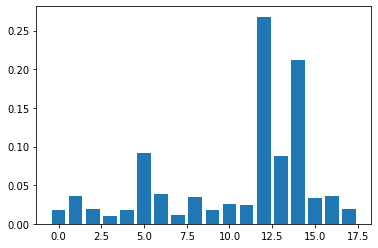

In [75]:
from matplotlib import pyplot
# feature importance
print(clf.feature_importances_)
# plot
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

In [76]:
dataTrainBalanceado.columns


Index(['Survived', 'Age', 'SibSp', 'Ticket', 'Parch', 'Fare', 'Sex_female',
       'Pclass_3', 'Pclass_2', 'Pclass_1', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Mr', 'Mrs', 'Miss', 'Master', 'With_Cabin', 'Kid'],
      dtype='object')

In [77]:
dataTest = pd.read_csv('../testMap.csv')


In [80]:
dataTest.columns

Index(['PassengerId', 'Age', 'SibSp', 'Ticket', 'Parch', 'Fare', 'Sex_female',
       'Pclass_3', 'Pclass_2', 'Pclass_1', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Mr', 'Mrs', 'Miss', 'Master', 'With_Cabin', 'Kid'],
      dtype='object')

In [78]:
dataTest["Fare"] = dataTest["Fare"].fillna(0)
dataTest["Fare_mean"] = dataTest["Fare"] > dataTest["Fare"].mean()

In [79]:
dataTest = dataTest[["PassengerId",  'Age', 'SibSp', 'Ticket', 'Parch', 'Fare',
       'Sex_female', 'Pclass_3', 'Pclass_2', 'Pclass_1', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Mr', 'Mrs', 'Miss', 'Master', 'With_Cabin', 'Kid']]

In [81]:
passengerId = dataTest["PassengerId"]
dataTest = dataTest.drop("PassengerId",axis=1)

In [82]:
X_test = scaler.transform(dataTest)

In [83]:
result = clf.predict(X_test)

In [84]:
dataTest["PassengerId"] = passengerId
dataTest["Survived"] = result

In [85]:
dataTest["Survived"].sum()

178

In [86]:
dataTest[["PassengerId","Survived"]].to_csv('submitXBBalanceado.csv',index = False)
